### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv('CarPrice_Assignment.csv')
df = df.drop(['car_ID','CarName'], axis=1)
df.sample(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
194,-2,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940.0
34,1,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
161,0,gas,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358.0
129,1,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5
138,2,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0


In [52]:
def one_hot_encode_columns(df, columns):
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_columns}")
    
    # Perform one-hot encoding
    encoded_df = pd.get_dummies(df, columns=columns, drop_first=False)
    
    return encoded_df

columns_to_encode = ['fueltype', 'carbody','aspiration','doornumber','enginelocation','drivewheel','drivewheel','enginetype','cylindernumber','fuelsystem']

# Perform one-hot encoding
df = one_hot_encode_columns(df, columns_to_encode)
df.replace({True: 1, False: 0})

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [58]:
X = df.drop(columns=['price'])
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_train=sc.fit_transform(X_train)
scaled_train

array([[ 1.01082459,  0.08014771,  0.17084299, ...,  1.14449078,
        -0.22645541, -0.07832604],
       [-1.40337783,  2.70899247,  2.32100392, ...,  1.14449078,
        -0.22645541, -0.07832604],
       [ 1.81555873,  0.0314654 ,  0.99782796, ...,  1.14449078,
        -0.22645541, -0.07832604],
       ...,
       [-0.59864369,  1.47570727,  1.00609781, ...,  1.14449078,
        -0.22645541, -0.07832604],
       [-0.59864369,  2.28707911,  2.07290843, ...,  1.14449078,
        -0.22645541, -0.07832604],
       [ 1.01082459, -0.08212666,  0.13776359, ...,  1.14449078,
        -0.22645541, -0.07832604]])

In [152]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(scaled_train)
var=pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(var)
cumulative_variance_ratio


array([0.21597413, 0.34571906, 0.42449238, 0.48720098, 0.54428424,
       0.59713803, 0.63736992, 0.67570742, 0.70663825, 0.7358673 ,
       0.76155099, 0.78480135, 0.80766269, 0.82753886, 0.84682445,
       0.86490195, 0.88232273, 0.89785904, 0.91205923, 0.92535381,
       0.93792643, 0.94811112, 0.95652092, 0.96429241, 0.9703338 ,
       0.97588855, 0.98075671, 0.98528271, 0.98899263, 0.99232076,
       0.9943323 , 0.99600462, 0.99710974, 0.99813593, 0.99887569,
       0.99941899, 0.99970018, 0.99994263, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [146]:
var_ratio={}
for n in range(2,56):
    pc=PCA(n_components=n)
    carSale_pca=pc.fit(scaled_train)
    var_ratio[n]=sum(carSale_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.3457190621537337,
 3: 0.4244923788735766,
 4: 0.4872009834867427,
 5: 0.5442842381545271,
 6: 0.5971380298251103,
 7: 0.6373699219383857,
 8: 0.6757074170578208,
 9: 0.7066382500184245,
 10: 0.7358672982219362,
 11: 0.7615509873380178,
 12: 0.7848013530482666,
 13: 0.8076626910304298,
 14: 0.8275388612702314,
 15: 0.8468244455161203,
 16: 0.8649019499528627,
 17: 0.8823227333960966,
 18: 0.8978590426787552,
 19: 0.9120592339150327,
 20: 0.9253538148279067,
 21: 0.9379264347378989,
 22: 0.9481111237701025,
 23: 0.9565209215610906,
 24: 0.9642924112942777,
 25: 0.9703337971395936,
 26: 0.9758885452191292,
 27: 0.9807567066687695,
 28: 0.9852827142647133,
 29: 0.9889926306343211,
 30: 0.9923207632758383,
 31: 0.9943322974067426,
 32: 0.996004617919132,
 33: 0.9971097371761933,
 34: 0.9981359285467534,
 35: 0.9988756856970338,
 36: 0.9994189853696334,
 37: 0.9997001818934217,
 38: 0.9999426274439356,
 39: 1.0,
 40: 1.0,
 41: 1.0,
 42: 1.0,
 43: 1.0,
 44: 1.0,
 45: 1.0,
 46: 1.0,
 47:

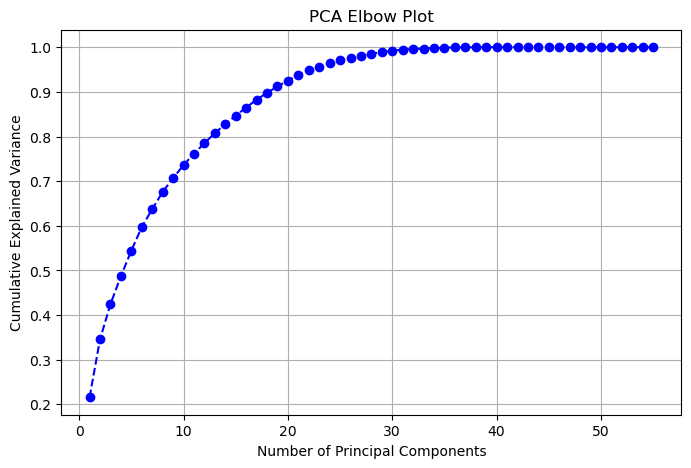

In [120]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('PCA Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [88]:
pc_final=PCA(n_components=12).fit(scaled_train)

In [90]:
loadings = pca.components_
print(loadings.shape)
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)
# Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T

(55, 55)


In [92]:
# pc_final.components_
# pc_final.explained_variance_
sum(pc_final.components_)

array([ 2.48248367e-01, -2.62488000e-01, -2.98886392e-01, -1.19020811e-01,
       -5.24130812e-01,  1.98351186e-01, -1.00246930e-02, -9.30360189e-03,
       -6.01003034e-01,  1.41189869e-01,  2.94226518e-01,  1.64601842e-01,
       -1.20949322e-01, -2.64526632e-01,  1.57864193e-01, -1.57864193e-01,
        2.54763812e-01, -5.27406772e-01,  5.24238485e-01, -3.37836758e-01,
       -5.79429795e-02, -5.66550238e-01,  5.66550238e-01, -7.24575257e-01,
        7.24575257e-01,  4.43457189e-01, -4.43457189e-01,  1.00643226e+00,
       -9.82034362e-01,  5.54518616e-01,  1.00643226e+00, -9.82034362e-01,
        5.54518616e-01,  7.07313274e-01, -3.04235794e-18,  4.26364075e-01,
       -1.01616290e+00,  3.23142677e-01,  3.38749320e-01,  1.73725731e-01,
       -2.56613663e-01, -2.93847666e-01, -1.89779479e-03,  8.73153095e-02,
        0.00000000e+00,  6.53339263e-01,  1.73725731e-01,  4.52216328e-01,
       -6.75517424e-01,  1.03020432e-01,  1.57864193e-01, -2.19262196e-01,
        2.70779415e-01,  

In [86]:
100*pc_final.explained_variance_[1]/sum(pc_final.components_)

SyntaxError: invalid syntax (1250363060.py, line 1)

In [106]:
loadings_df.to_excel("loadings_df.xlsx")

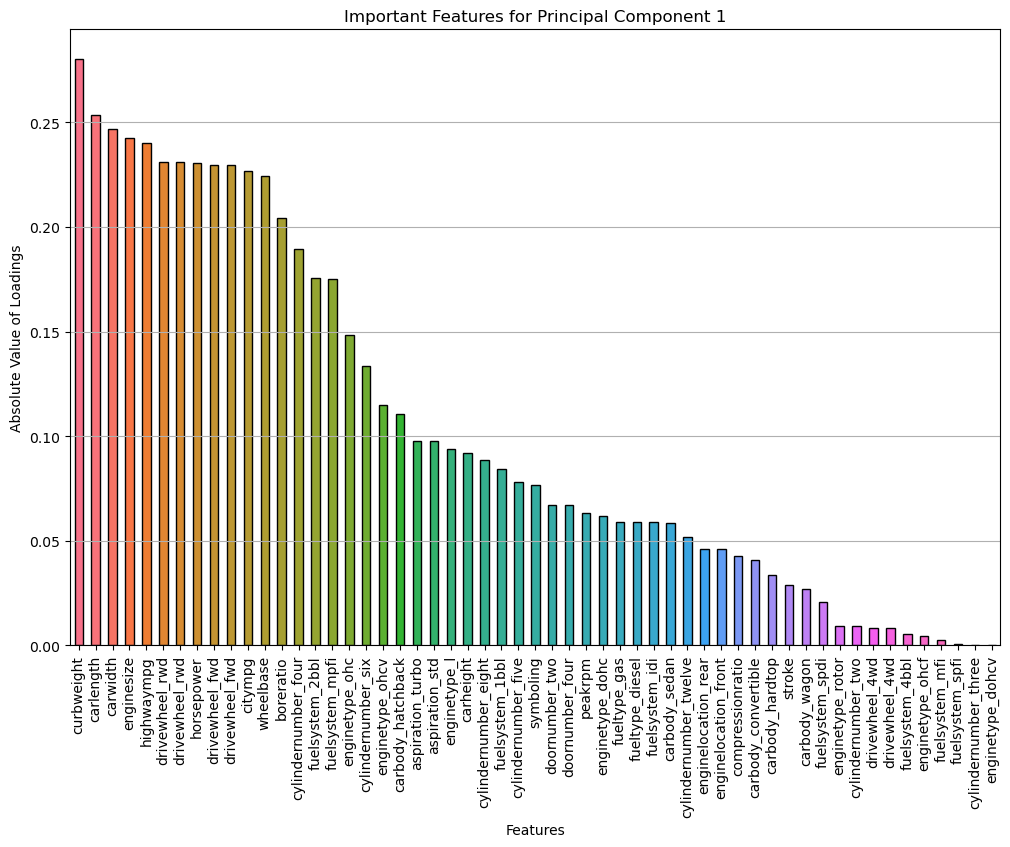

In [108]:
important_features = loadings_df['PC1'].abs().sort_values(ascending=False)
colors = sns.color_palette("husl", len(important_features))
plt.figure(figsize=(12, 8))
loadings_df['PC1'].abs().sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')
plt.title('Important Features for Principal Component 1')
plt.ylabel('Absolute Value of Loadings')
plt.xlabel('Features')
plt.grid(axis='y')
plt.show()

## ================================================

### PCA by Different Way

In [468]:
sc1=StandardScaler()
cardata_scaled=sc1.fit_transform(Numeric_Columns)

In [470]:
pc = PCA(n_components=None)
pc.fit(cardata_scaled)
var= pc.explained_variance_ratio_
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [475]:
var_ratio={}
for n in range(2,16):
    pc=PCA(n_components=n)
    telco_pca=pc.fit(cardata_scaled)
    var_ratio[n]=sum(telco_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.6731086738881489,
 3: 0.7583840349021007,
 4: 0.8214037980100201,
 5: 0.8633009960818302,
 6: 0.9001438540145696,
 7: 0.9284383669808961,
 8: 0.9511166390494746,
 9: 0.9685312388049964,
 10: 0.9774759462591487,
 11: 0.9852563991666089,
 12: 0.9905603792321808,
 13: 0.9953650913689569,
 14: 0.998730530792799,
 15: 1.0000000000000002}

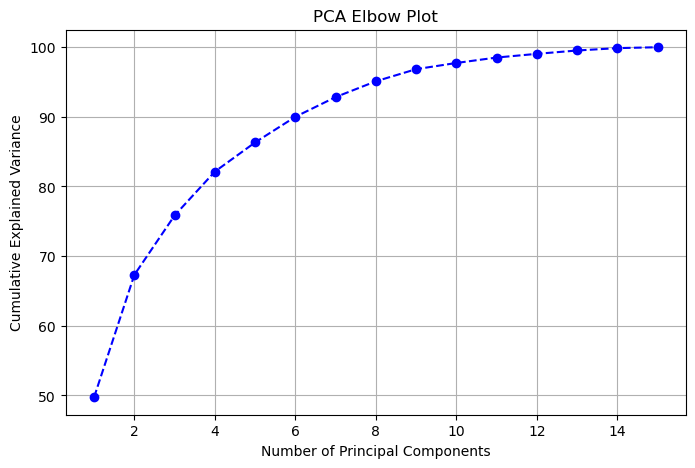

In [479]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var) + 1), var1, marker='o', linestyle='--', color='b')
plt.title('PCA Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [492]:
target_variance = 0.95

In [496]:
n_components = np.argmax(var1 >= target_variance) + 1
print(f"Number of components to explain {target_variance * 100:.0f}% variance: {n_components}")

Number of components to explain 95% variance: 1


In [506]:
pc_final=PCA(n_components=2).fit(scaled_train)

In [508]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

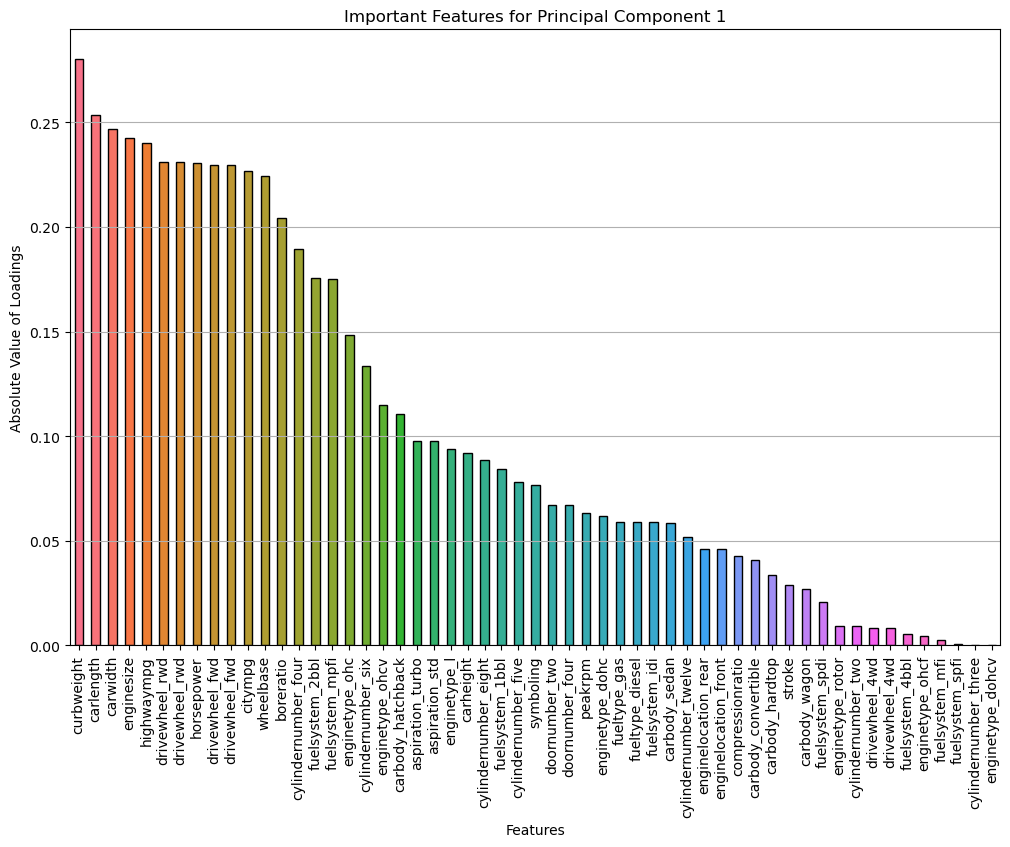

In [510]:
important_features = loadings_df['PC1'].abs().sort_values(ascending=False)
colors = sns.color_palette("husl", len(important_features))
plt.figure(figsize=(12, 8))
loadings_df['COL1'].abs().sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')
plt.title('Important Features for Principal Component 1')
plt.ylabel('Absolute Value of Loadings')
plt.xlabel('Features')
plt.grid(axis='y')
plt.show()